<a href="https://colab.research.google.com/github/gabrieldepaiva/ProjetosParalelos/blob/main/WebScriping_Cotacoes_Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das Bibliotecas Necessárias

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Importação dos dados do Yahoo Finance

In [2]:
# Será usado apenas uma empresa para a realização das análises.
# Para o exemplo foram utilizadas as cotações da empresa Procter & Gamble nas datas desde 01/01/2020 até hoje.

data = wb.DataReader('PG', data_source = 'yahoo', start = '2020-1-1')
data.head() # primeiros cinco registros

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,124.730003,122.940002,124.500000,123.410004,8130800.0,120.435463
2020-01-03,123.529999,121.860001,122.160004,122.580002,7970500.0,119.625465
2020-01-06,123.190002,122.379997,122.570000,122.750000,6674400.0,119.791367
2020-01-07,123.209999,121.870003,122.879997,121.989998,7583400.0,119.049675
2020-01-08,123.430000,122.000000,122.190002,122.510002,5385100.0,119.557144


## Adição de uma coluna referente às variações diárias

In [3]:
data['variacao'] = (data['Adj Close']/data['Adj Close'].shift(+1))-1 #-> o "shift(+1) ou shift(-1) representa o movimento de 
data.head()

,High,Low,Open,Close,Volume,Adj Close,variacao
Date,,,,,,,
2020-01-02,124.730003,122.940002,124.500000,123.410004,8130800.0,120.435463,NaN
2020-01-03,123.529999,121.860001,122.160004,122.580002,7970500.0,119.625465,-0.006726
2020-01-06,123.190002,122.379997,122.570000,122.750000,6674400.0,119.791367,0.001387
2020-01-07,123.209999,121.870003,122.879997,121.989998,7583400.0,119.049675,-0.006192
2020-01-08,123.430000,122.000000,122.190002,122.510002,5385100.0,119.557144,0.004263


## Primeiro gráfico referente aos dados importados

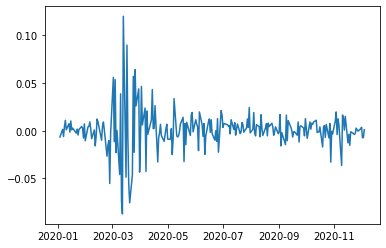

In [4]:
plt.plot(data['variacao'])
plt.plot(figsize=(30))
plt.show()

## Cálculo das Médias dos Retornos

In [5]:
media_retorno = data['variacao'].mean()
round(media_retorno*252,4) # arredondamento para 4 casas decimais depois de multiplicar pelo ano over - 252 dias úteis
print(str(round(media_retorno*252,4)*100)+'%') # deixando a saída de código mais legível

19.85%


## Adição de uma nova coluna com logarítmo natural

In [6]:
data['ret_logaritmo'] = (np.log(data['Adj Close']/data['Adj Close'].shift(+1)))
data.head()

,High,Low,Open,Close,Volume,Adj Close,variacao,ret_logaritmo
Date,,,,,,,,
2020-01-02,124.730003,122.940002,124.500000,123.410004,8130800.0,120.435463,NaN,NaN
2020-01-03,123.529999,121.860001,122.160004,122.580002,7970500.0,119.625465,-0.006726,-0.006748
2020-01-06,123.190002,122.379997,122.570000,122.750000,6674400.0,119.791367,0.001387,0.001386
2020-01-07,123.209999,121.870003,122.879997,121.989998,7583400.0,119.049675,-0.006192,-0.006211
2020-01-08,123.430000,122.000000,122.190002,122.510002,5385100.0,119.557144,0.004263,0.004254


## Comparação entre a variação das duas colunas (Variação e Retorno Logarítmico)

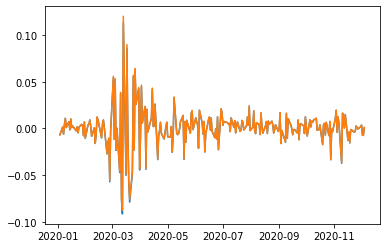

In [7]:
plt.plot(data['ret_logaritmo'])
plt.plot(data['variacao'])
figsize=20

## Comparação entre os retornos (Variação e Retorno Logarítmico)

In [8]:
media_retorno = data['variacao'].mean()
med_ret = str(round(media_retorno*252,4)*100)+'%'
print(f'Retorno usando variações sem logarítmo - {med_ret}')

media_retorno_log = data['ret_logaritmo'].mean()
med_ret_log = str(round(media_retorno_log*252,3)*100)+'%'
print(f'Retorno usando variações com logarítmo - {med_ret_log}')

Retorno usando variações sem logarítmo - 19.85%
Retorno usando variações com logarítmo - 14.2%
